Thanks for coming to see my notebook! I am not a fluent English writer, so I apologize if I am difficult to understand!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import time
warnings.simplefilter('ignore')

# Import Library

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e9/train.csv")
train_df.drop("id",inplace=True,axis=1)
add_df = pd.read_csv("/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e9/test.csv")
test_df.drop("id",inplace=True,axis=1)

# Data Incorporation & Data Check
Add 'Flag' to distinguish between the original and the generated dataset. Next, we check the structure of the data

In [3]:
print(train_df.shape)
train_df.head()

(5407, 9)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [4]:
train_df["CementComp"] = train_df["CementComponent"]
train_df["Flag"] = 1
train_df.drop("CementComponent",inplace=True,axis=1)

In [5]:
print(add_df.shape)
add_df.head()

(1030, 9)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
add_df["CementComp"] = add_df.iloc[:,0]
add_df["Flag"] = 0
add_df = add_df.iloc[:,1:]

In [7]:
train_df = pd.concat([train_df,add_df],ignore_index=True)

In [8]:
test_df["CementComp"] = test_df["CementComponent"]
test_df.drop("CementComponent",inplace=True,axis=1)
test_df["Flag"] = 1

In [9]:
train_df

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,CementComp,Flag
0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,525.0,1
1,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,143.0,1
2,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,289.0,1
3,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,304.0,1
4,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,157.0,1
...,...,...,...,...,...,...,...,...,...,...
6432,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,276.4,0
6433,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,322.2,0
6434,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,148.5,0
6435,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,159.1,0


In [10]:
train_df.isnull().sum()

BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
CementComp                   0
Flag                         0
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BlastFurnaceSlag           6437 non-null   float64
 1   FlyAshComponent            6437 non-null   float64
 2   WaterComponent             6437 non-null   float64
 3   SuperplasticizerComponent  6437 non-null   float64
 4   CoarseAggregateComponent   6437 non-null   float64
 5   FineAggregateComponent     6437 non-null   float64
 6   AgeInDays                  6437 non-null   int64  
 7   Strength                   6437 non-null   float64
 8   CementComp                 6437 non-null   float64
 9   Flag                       6437 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 503.0 KB


In [12]:
train_df.describe()

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,CementComp,Flag
count,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000
mean,61.056408,35.443561,184.514758,4.443862,988.947395,771.597685,50.777225,35.510618,296.287914,0.839988
std,84.062442,56.800359,19.041684,5.789045,77.555433,78.957633,68.990009,16.450129,105.571750,0.366646
min,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,102.000000,0.000000
25%,0.000000,0.000000,173.000000,0.000000,938.000000,734.300000,7.000000,23.690000,212.500000,1.000000
50%,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,28.000000,33.960000,295.800000,1.000000
75%,129.900000,94.000000,192.000000,8.700000,1047.000000,821.000000,56.000000,45.850000,374.000000,1.000000
max,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,540.000000,1.000000


# Variable Meaning
## According to the original dataset, each column has the following meaning

CementComponent:- Amount of cement is mixed

BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed

FlyAshComponent:- Amount of FlyAsh is mixed

WaterComponent:- Amount of water is mixed

SuperplasticizerComponent:- Amount of Super plasticizer is mixed

CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed

FineAggregateComponent:- Amount of Coarse Aggregate is mixed

AgeInDays:- How many days it was left dry

Strength:- What was the final strength of concrete- (Target)


https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength

In [13]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df.rename({'CementComp':'CementComponent'},inplace=True,axis=1)
df['Water_Cement'] = df['WaterComponent']/df['CementComponent']
df['Coarse_Fine'] = df['CoarseAggregateComponent']/df['FineAggregateComponent']
df['Aggregate'] = df['CoarseAggregateComponent'] + df['FineAggregateComponent']
df['Aggregate_Cement'] = df['Aggregate']/df['CementComponent']
df['Slag_Cement'] = df['BlastFurnaceSlag']/df['CementComponent']
df['Ash_Cement'] = df['FlyAshComponent']/df['CementComponent']
df['Plastic_Cement'] = df['SuperplasticizerComponent']/df['CementComponent']
df['Age_Water'] = df['AgeInDays']/df['WaterComponent']
train_df = df[:l]
test_df = df[l:]

# Histograms of All Variables¶
Histograms help you understand the distribution of each piece of data.

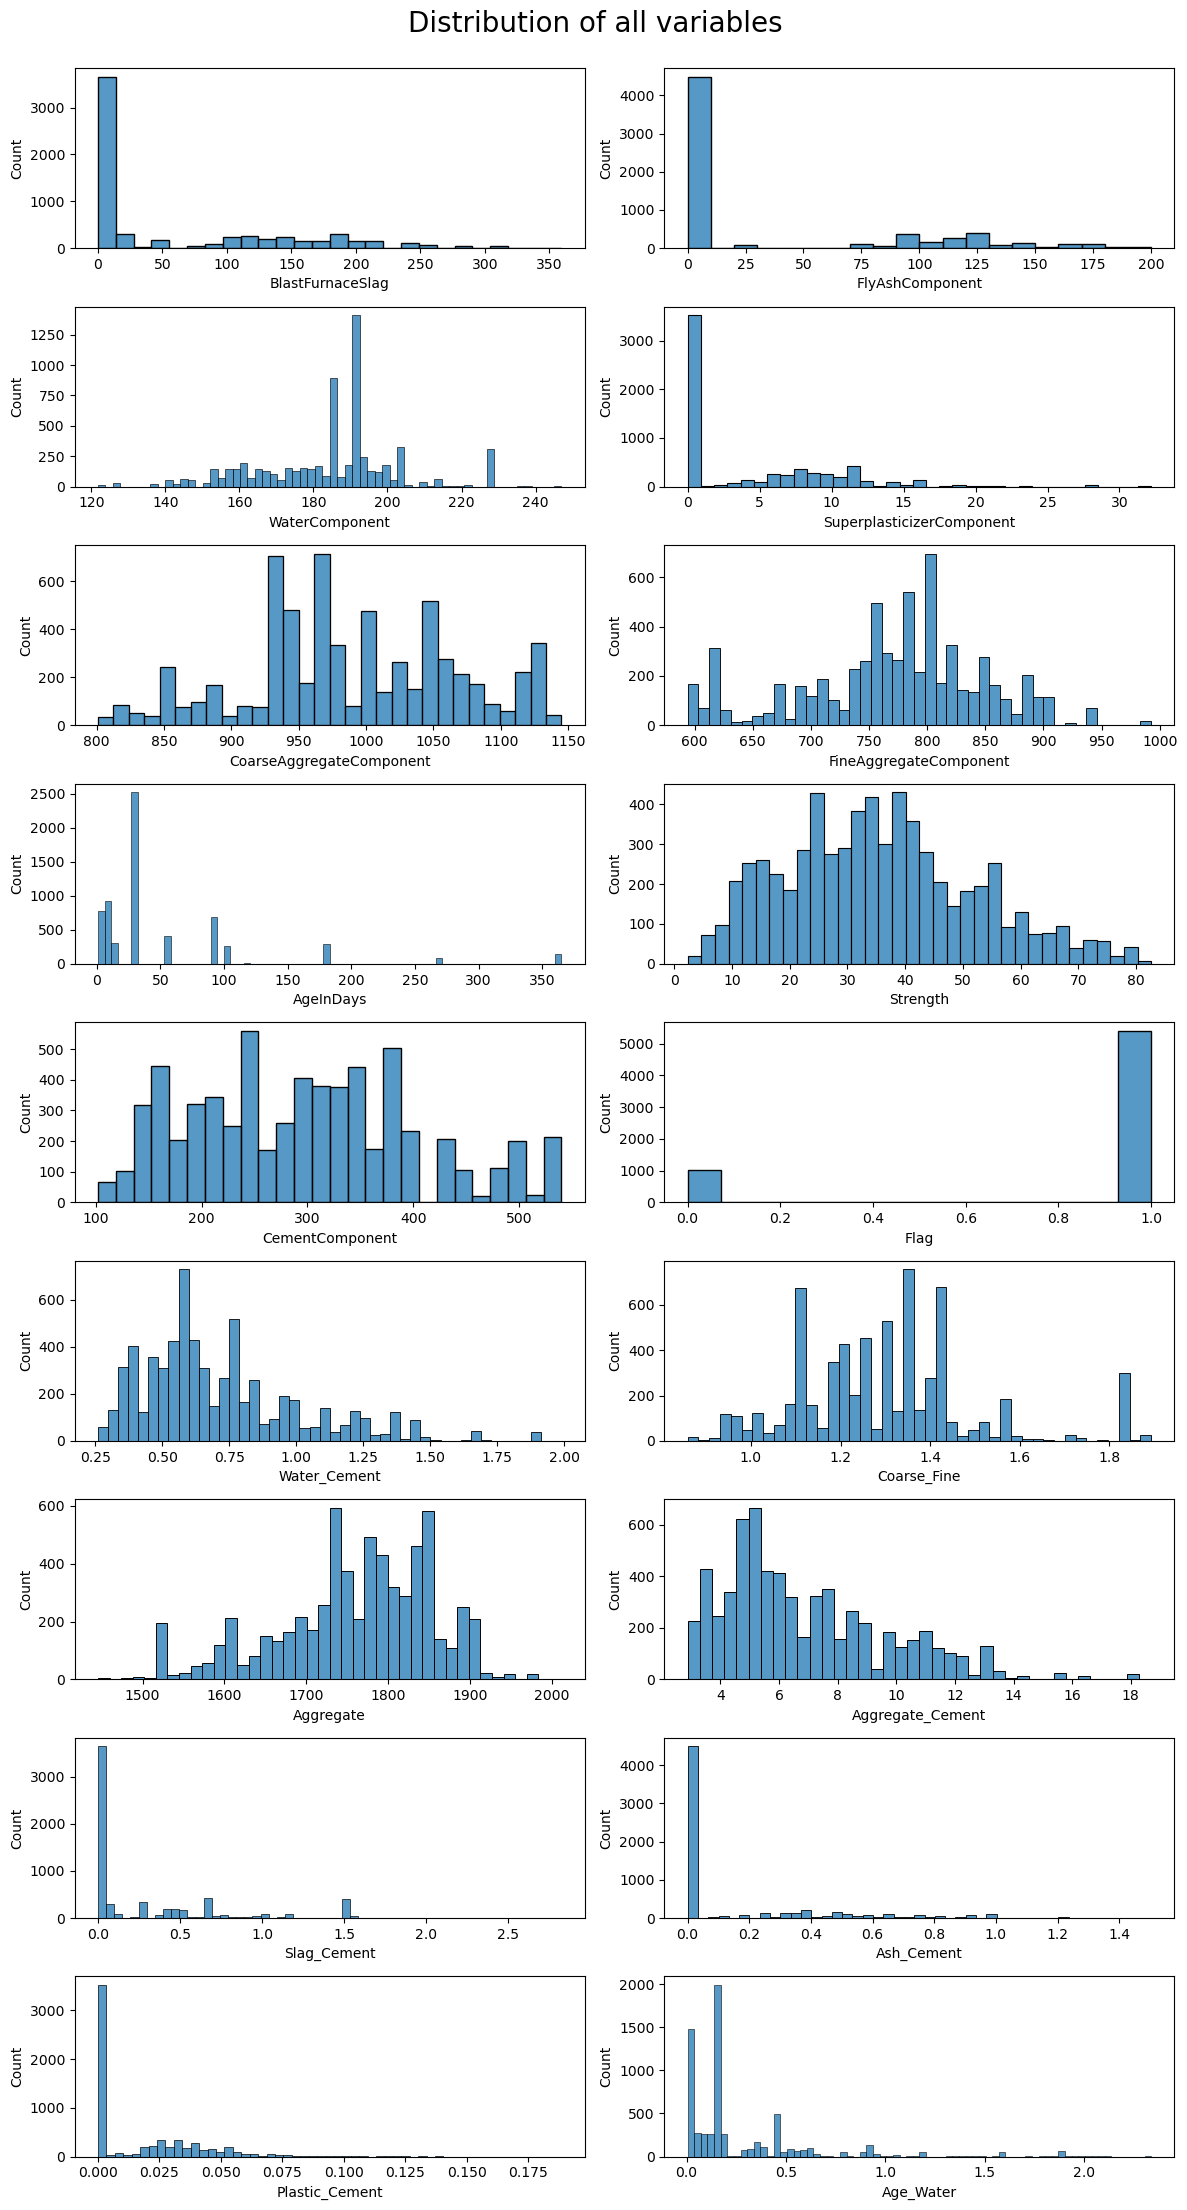

In [14]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Correlation coefficient for TARGET¶
Using correlation coefficients and heat maps, find variables that are significantly involved in TARGET.

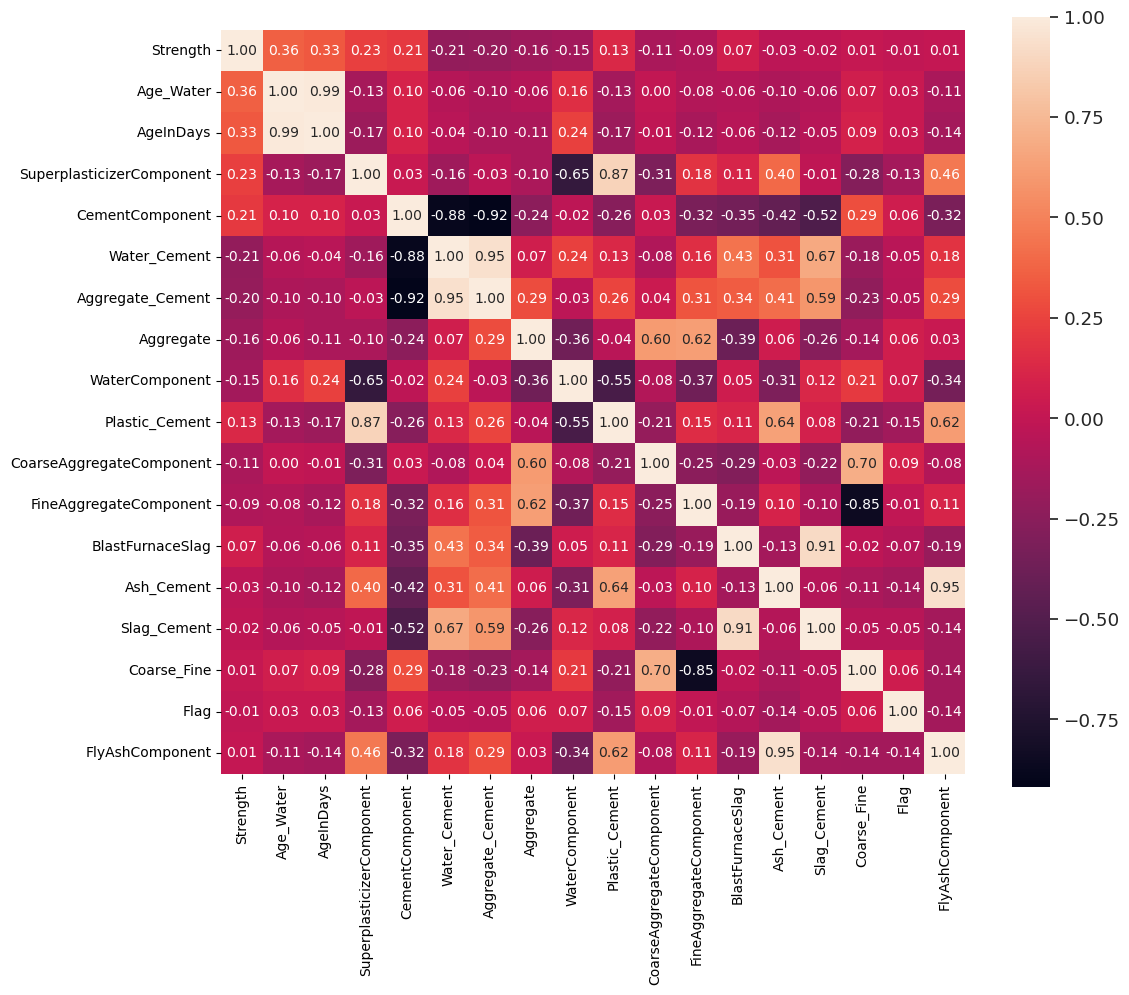

In [15]:
TARGET = "Strength"
k = 20
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Let's try machine learning in this state...

In [16]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [17]:
X = train_df[train_df.columns.drop(TARGET)]
y = train_df[TARGET]

In [20]:
lgb_params = {
        'objective':'regression', 
        'metric': 'rmse', 
        'task': 'train',
        'seed': 42,
        'n_estimators':20000,
        'device':'gpu',
        'boosting_type': 'gbdt',
        'learning_rate':0.05,
        'max_depth':4
        }

models_lgb = []
valid_scores = []

cv = KFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_lgb = lgb.LGBMRegressor(**lgb_params)
    model_lgb.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)],
                  verbose=0,
                 early_stopping_rounds=150,)
    
    valid_preds = model_lgb.predict(X_valid)
    valid_score = mean_squared_error(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_lgb.append(model_lgb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

133.90328377441372
131.8306367349884
103.49097675128225
127.10787450269551
125.27924434703874
130.66214249026748
116.10621168494063
145.13389617019985
137.64916553721756
136.63414293085427
152.6060934907463
112.24874306393353
122.4391687067503
147.75424415397993
124.74632929404152
mean:129.83947690889


In [21]:
xgb_params = {'max_depth': 4,
          'learning_rate': 0.05,
          'n_jobs': -1,
          'n_estimators':2000,
          'objective': 'reg:squarederror',
          'early_stopping_rounds': 150,
          'tree_method':'gpu_hist'
         }

models_xgb = []
valid_scores = []

cv = KFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_xgb = xgb.XGBRegressor(**xgb_params)
    model_xgb.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)],
                  verbose=0)
    
    valid_preds = model_xgb.predict(X_valid)
    valid_score = mean_squared_error(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_xgb.append(model_xgb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

133.80883524735933
132.3636847125137
103.38018951078227
129.92436862768733
126.61217051744549
130.71864514862213
115.60534500912503
147.75359831221536
136.6525598649502
142.49402723775873
150.90411732402382
112.55857382838538
122.73457557651183
148.09891674343842
124.96807995311504
mean:130.57184584092892


In [22]:
cb_params = {
        'loss_function':'RMSE',
        'learning_rate':0.05,
        'iterations':20000,
}

models_cb = []
valid_scores = []

cv = KFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_cb = cat.CatBoostRegressor(**cb_params)
    model_cb.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)],
                  verbose=0,
                  early_stopping_rounds=150,
                  use_best_model=True)
    
    valid_preds = model_cb.predict(X_valid)
    valid_score = mean_squared_error(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_cb.append(model_cb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

134.3997764135783
132.1212931494071
101.22513209755185
125.40416860091167
124.39061899306506
127.75247542315056
113.90809148924494
142.46060405975138
134.47543394000553
134.8513318230347
150.64501830234985
112.41430319174836
122.02786121532667
145.31646389628145
120.15149956962361
mean:128.1029381443354


# Create a submission file

In [27]:
def predict(test_df,models):
    y = np.zeros(len(test_df))
    for model in models:
        y += model.predict(test_df)
    return y / len(models)
test_df.drop("Strength",axis=1,inplace=True)
sub = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')
sub[TARGET] = predict(test_df,models_lgb)
sub.to_csv('/kaggle/working/lgb.csv',index=False)
sub[TARGET] = predict(test_df,models_xgb)
sub.to_csv('/kaggle/working/xgb.csv',index=False)
sub[TARGET] = predict(test_df,models_cb)
sub.to_csv('/kaggle/working/cb.csv',index=False)
sub[TARGET] = (predict(test_df,models_cb)+predict(test_df,models_xgb)+predict(test_df,models_lgb))/3
sub.to_csv('/kaggle/working/mix.csv',index=False)
